How does the probability of a Blackjack player going over 21 change depending on their starting hand total assuming the player hits until they either bust or stand?

I am going to simulate this situation in order to find the empirical probability 

The random variable I am observing is whether or not the player goes over 21 

One trial of my simulation looks like a player hitting and receiving a random card from the deck. 

I am assuming that the player will stand if they reach 17 or higher, the deck is infinite, Aces are treated as either 1's or 11's, and that the dealers hand is ignored. 

In [5]:
import gymnasium as gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
env = gym.make("Blackjack-v1", sab=True)

starting_totals = list(range(4, 21)) 
trials = 1000 


bust_probs = []    
bust_means = []   
bust_stds = []     

for total in starting_totals:
    bust_outcomes = []
    for _ in range(trials):
        done = False
        observation = env.reset()[0]
        observation = (total, observation[1], observation[2])
        while not done:
            if observation[0] < 17:
                action = 1  
            else:
                action = 0 
            observation, reward, done, _, _ = env.step(action)

        bust_outcomes.append(1 if reward == -1 else 0)

    bust_probs.append(np.mean(bust_outcomes))   
    bust_means.append(np.mean(bust_outcomes))   
    bust_stds.append(np.std(bust_outcomes))     

results_df = pd.DataFrame({
    "Starting Total": starting_totals,
    "Bust Probability": bust_probs,
    "Mean": bust_means,
    "Standard Deviation": bust_stds
})

print("Bust Probability Results by Starting Hand Total:")
print(results_df)

Bust Probability Results by Starting Hand Total:
    Starting Total  Bust Probability   Mean  Standard Deviation
0                4             0.645  0.645            0.478513
1                5             0.662  0.662            0.473029
2                6             0.651  0.651            0.476654
3                7             0.620  0.620            0.485386
4                8             0.653  0.653            0.476016
5                9             0.661  0.661            0.473370
6               10             0.636  0.636            0.481149
7               11             0.660  0.660            0.473709
8               12             0.657  0.657            0.474711
9               13             0.648  0.648            0.477594
10              14             0.660  0.660            0.473709
11              15             0.630  0.630            0.482804
12              16             0.643  0.643            0.479115
13              17             0.561  0.561            

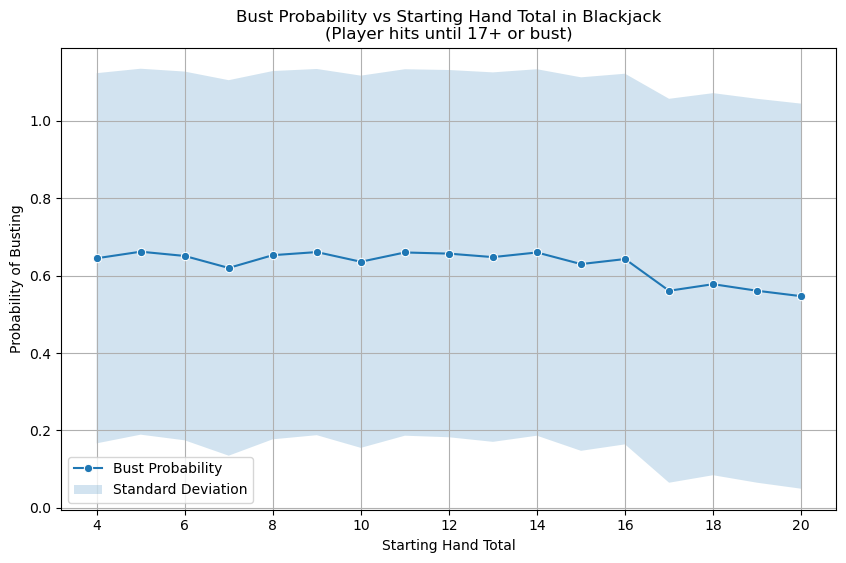

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(x=starting_totals, y=bust_probs, marker="o", label="Bust Probability")
plt.fill_between(
    starting_totals, 
    np.array(bust_probs)-np.array(bust_stds), 
    np.array(bust_probs)+np.array(bust_stds), 
    alpha=0.2, label="Standard Deviation"
)
plt.xlabel("Starting Hand Total")
plt.ylabel("Probability of Busting")
plt.title("Bust Probability vs Starting Hand Total in Blackjack\n(Player hits until 17+ or bust)")
plt.legend()
plt.grid(True)
plt.show()

The probability of a Blackjack player going over 21 changes slightly depending on their starting hand total. According to the simulation, starting totals below 17 have a moderate chance of busting, around 0.63–0.66 (e.g., starting at 12 → 0.657, 16 → 0.643). For starting totals of 17 and higher, the probability decreases (17 → 0.561, 20 → 0.547) because the player stands immediately. These results are supported by empirical probability, mean, and standard deviation, which show how likely the player is to bust for each starting total.